- module import

In [4]:
# EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (25,10)

# Seperate
from sklearn.model_selection import train_test_split

# Machine Learning model
from lightgbm import LGBMClassifier

In [ ]:
import sk

- data load

In [2]:
card_df = pd.read_csv('creditcard.csv')
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- data EDA

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Null : 0
[0 1]
Total :  284807
True_ :  284315
False_ :  492
False_ ratio > 0.002


'<after>'

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,120537.000000,120537.000000,120537.000000,120537.000000,120537.000000,120537.000000,120537.000000,120537.000000,120537.000000,120537.000000,...,120537.000000,120537.000000,120537.000000,120537.000000,120537.000000,120537.000000,120537.000000,120537.000000,120537.000000,120537.0
mean,0.855309,0.001917,0.060900,0.118631,-0.176240,-0.396127,0.013748,0.006887,0.026409,-0.060576,...,-0.059945,-0.035083,-0.061664,0.007813,0.015991,0.061241,-0.017837,0.008692,0.004972,0.0
std,1.095777,0.726322,1.169295,0.995772,0.735831,0.609672,0.642048,0.276981,0.820589,0.595290,...,0.181554,0.237924,0.659168,0.187718,0.501196,0.402677,0.415884,0.091664,0.060411,0.0
min,-3.087106,-2.623523,-3.469030,-3.178091,-2.514681,-2.316707,-2.070343,-0.861235,-2.351125,-1.706836,...,-0.583482,-0.795202,-2.190769,-0.527654,-1.407372,-1.251743,-1.107366,-0.247754,-0.165501,0.0
25%,-0.227191,-0.463511,-0.750300,-0.618037,-0.658669,-0.821316,-0.452544,-0.185476,-0.463802,-0.415880,...,-0.179596,-0.228767,-0.609636,-0.117014,-0.312000,-0.261470,-0.315207,-0.049529,-0.040480,0.0
50%,1.175647,0.001934,0.212730,0.221978,-0.164939,-0.457353,0.053084,-0.019862,0.007483,-0.088556,...,-0.080542,-0.046137,-0.071096,-0.000357,0.040764,0.090350,-0.031151,-0.004352,0.009559,0.0
75%,1.891244,0.485778,0.916148,0.734712,0.325389,-0.015931,0.451334,0.170189,0.536537,0.222907,...,0.048114,0.145237,0.440515,0.128675,0.394310,0.371503,0.203396,0.048126,0.036154,0.0
max,2.379970,2.775110,3.790995,3.060921,2.433526,1.810960,2.175094,0.881887,2.365008,1.550977,...,0.498967,0.730670,2.049508,0.510510,1.299212,1.287646,1.008886,0.262850,0.164505,0.0


<AxesSubplot:>

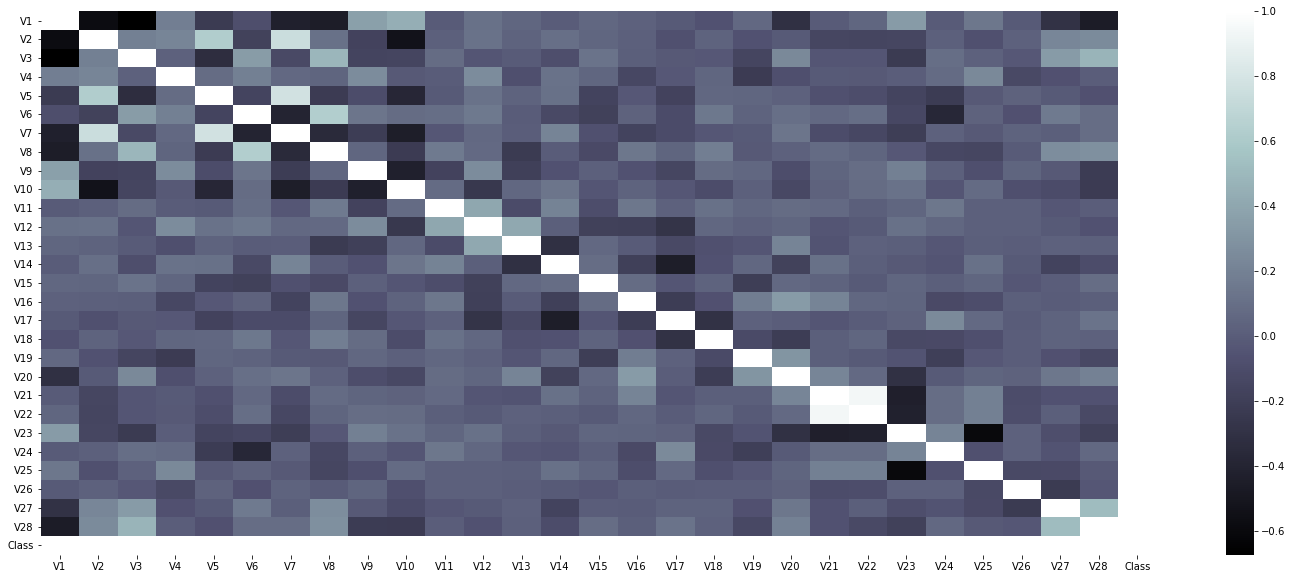

In [3]:
# describe
display(card_df.describe())

# null
print("Null :", card_df.isnull().sum().sum())

# variation
print(card_df['Class'].unique())

# var
Total = card_df["Class"].count()
True_ = card_df[card_df['Class']==0]['Class'].count()
False_ = card_df[card_df['Class']==1]['Class'].count()
print("Total : ", Total)
print("True_ : ", True_)
print("False_ : ", False_)

# drop columns
card_df = card_df.drop(['Time','Amount'],axis=1)

# ratio
print("False_ ratio > {:.1}".format((False_/Total))) # 0.02% - stritify = False_ varation

# drop outlier - defenition
def out_iqr(col):
    index = []

    q1 = card_df[col].describe()['25%']
    q3 = card_df[col].describe()['75%']
    iqr = q3-q1
    outlier = card_df[(card_df[col]<(q1-iqr*1.5)) | (card_df[col]>(q3+iqr*1.5))]
    A = outlier.index.to_list()
    A_ = set(A)
    A_cnt = len(A_)
    return A_
    
    
for i in card_df.columns:
    card_df = card_df.drop(out_iqr(i))

display("<after>", card_df.describe())

# correlation 
sns.heatmap(card_df.corr(),annot=False,cmap="bone")

- Seperate

In [16]:
# before seperate
X = card_df.iloc[:,:-1]
y = card_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123,stratify=y)

train_cnt = y_train.count()
test_cnt = y_test.count()
print(X_train.shape,X_test.shape)
print('학습 분포 비율:\n',y_train.value_counts()/train_cnt)
print('\n 테스트 분포 비율:\n', y_test.value_counts()/test_cnt)

(96429, 28) (24108, 28)
학습 분포 비율:
 0    1.0
Name: Class, dtype: float64

 테스트 분포 비율:
 0    1.0
Name: Class, dtype: float64


- model

In [17]:
from imblearn.over_sampling import SMOTE